In [1]:
# importing libraries
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt 
import seaborn as sn                   
%matplotlib inline
import warnings                        
warnings.filterwarnings("ignore")

In [2]:
# loading the data
train = pd.read_csv('train_qnU1GcL.csv')
test = pd.read_csv('test_LxCaReE_DvdCKVT2_7rMflxW_P2f9VpT.csv')

In [3]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [5]:
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

# 'target' is the target variable as it is not present in the test dataset.

In [7]:
train.shape, test.shape

((79853, 12), (34224, 11))

In [8]:
# Print data types for each variable
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [10]:
test.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
dtype: object

In [11]:
#printing first five rows of the dataset
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


# Univariate Analysis

In [9]:
train['target'].value_counts()

1    74855
0     4998
Name: target, dtype: int64

In [10]:
# Normalize can be set to True to print proportions instead of number 
train['target'].value_counts(normalize=True)

1    0.93741
0    0.06259
Name: target, dtype: float64

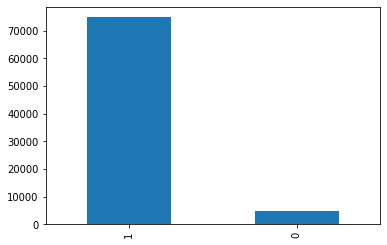

In [12]:
# plotting the bar plot of frequencies
train['target'].value_counts().plot.bar()

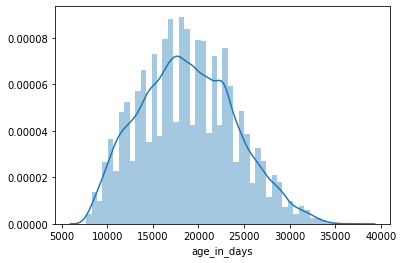

In [13]:
sn.distplot(train["age_in_days"])

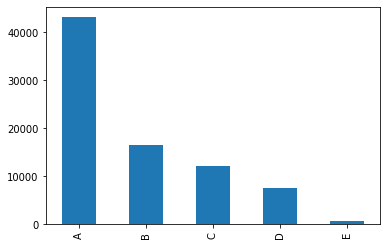

In [14]:
train['sourcing_channel'].value_counts().plot.bar()

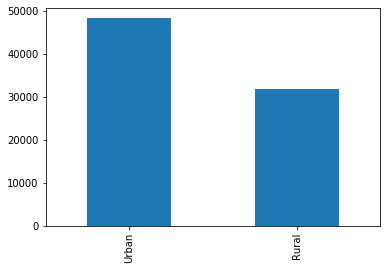

In [15]:
train['residence_area_type'].value_counts().plot.bar()

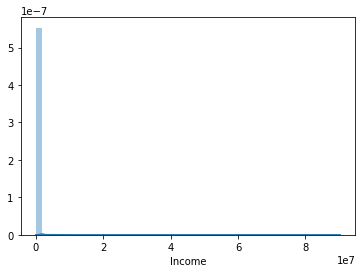

In [16]:
sn.distplot(train["Income"])

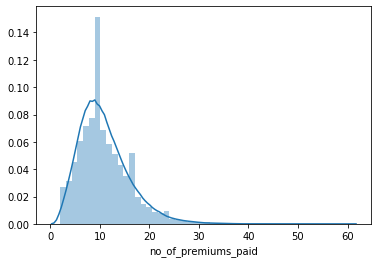

In [21]:
sn.distplot(train["no_of_premiums_paid"])

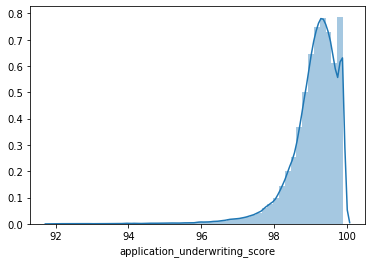

In [22]:
sn.distplot(train["application_underwriting_score"])

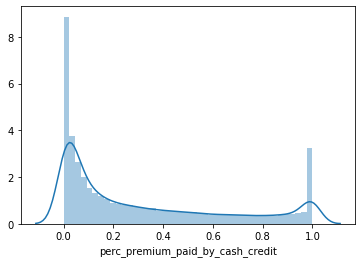

In [26]:
sn.distplot(train["perc_premium_paid_by_cash_credit"])

# Bivariate Analysis

target               0      1
sourcing_channel             
A                 2349  40785
B                 1066  15446
C                  903  11136
D                  634   6925
E                   46    563


Text(0, 0.5, 'Percentage')

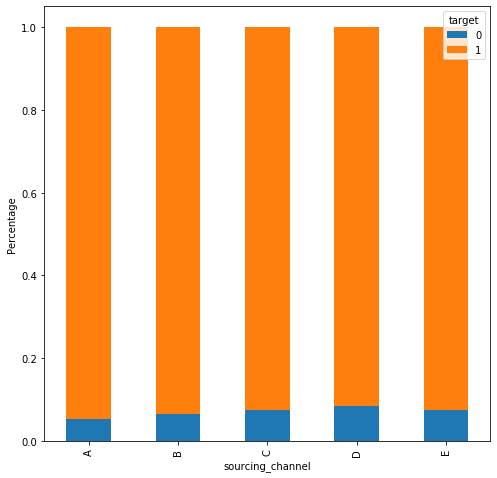

In [28]:
print(pd.crosstab(train['sourcing_channel'],train['target']))

job=pd.crosstab(train['sourcing_channel'],train['target'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('sourcing_channel')
plt.ylabel('Percentage')

target                  0      1
residence_area_type             
Rural                1998  29672
Urban                3000  45183


Text(0, 0.5, 'Percentage')

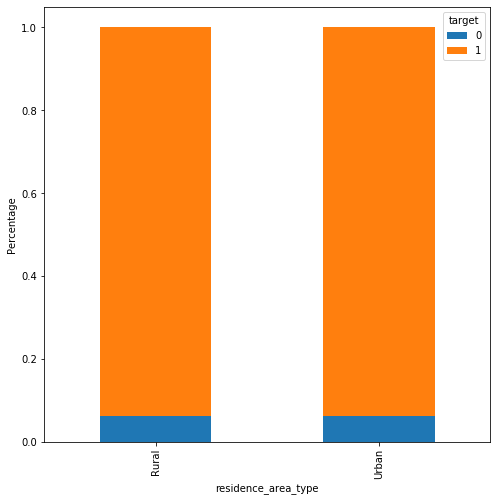

In [29]:
print(pd.crosstab(train['residence_area_type'],train['target']))

job=pd.crosstab(train['residence_area_type'],train['target'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('residence_area_type')
plt.ylabel('Percentage')

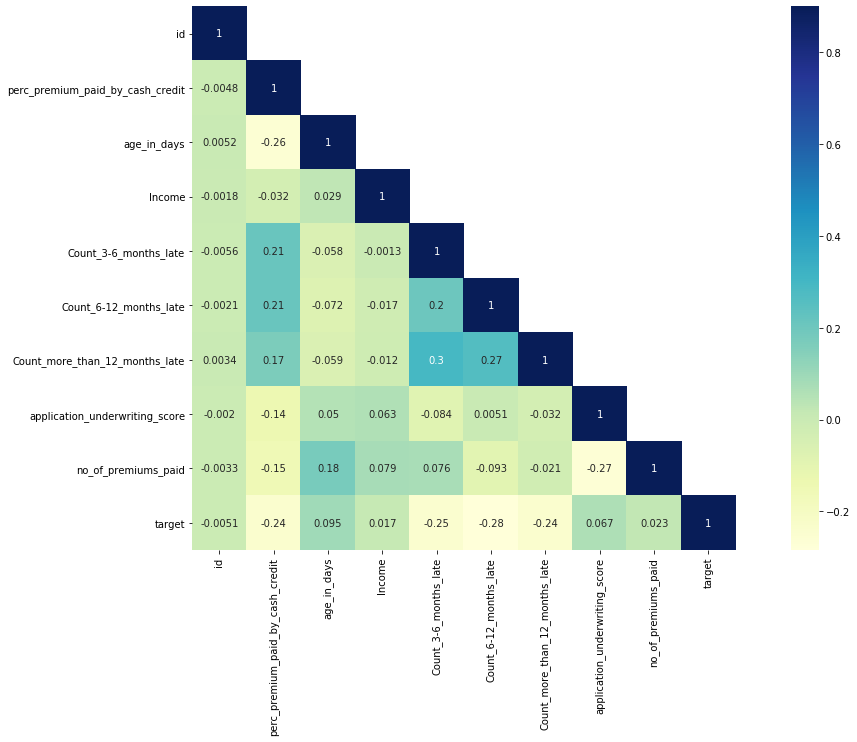

In [44]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [37]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [40]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [38]:
# Filling the missing values
train['Count_3-6_months_late'].fillna(train['Count_3-6_months_late'].median(), inplace = True) 
train['Count_6-12_months_late'].fillna(train['Count_6-12_months_late'].median(), inplace = True)
train['Count_more_than_12_months_late'].fillna(train['Count_more_than_12_months_late'].median(), inplace = True)
train['application_underwriting_score'].fillna(train['application_underwriting_score'].median(), inplace = True)

In [41]:
test['Count_3-6_months_late'].fillna(test['Count_3-6_months_late'].median(), inplace = True) 
test['Count_6-12_months_late'].fillna(test['Count_6-12_months_late'].median(), inplace = True)
test['Count_more_than_12_months_late'].fillna(test['Count_more_than_12_months_late'].median(), inplace = True)
test['application_underwriting_score'].fillna(test['application_underwriting_score'].median(), inplace = True)

In [42]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [49]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

# Model building

In [45]:
target_var = train['target']
train = train.drop('target',1)

In [46]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target_var, test_size = 0.2, random_state=12)

# Logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
# defining the logistic regression model
lreg = LogisticRegression()

In [52]:
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# making prediction on the validation set
prediction = lreg.predict(X_val)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.9378874209504727

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
# defining the decision tree model with depth of 4, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [82]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [84]:
# making prediction on the validation set
predict = clf.predict(X_val)

In [85]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.938826623254649

In [86]:
test = pd.get_dummies(test)

In [88]:
test_prediction = clf.predict(test)

In [89]:
submission = pd.DataFrame()

In [90]:
submission['id'] = test['id']
submission['target'] = test_prediction

In [91]:
submission.to_csv('submission.csv', header=True, index=False)